# Guided Project: Cleaning Employee Exit Surveys 
## In this guided project, we are cleaning then analyzing exit surveys from two government departments in Australia. 
The goal of this project is to gauge employees' reasons for resigning, and to ascertain patterns in the data. 

There are two main questions we are trying to answer: 
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib

dete_survey = pd.read_csv('/Users/Austen/Downloads/dete-exit-survey-january-2014.csv', header = 'infer')
tafe_survey = pd.read_csv('/Users/Austen/Downloads/tafe-employee-exit-survey-access-database-december-2013.csv', header = 'infer', encoding = 'latin1') 

### Data Exploration

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
print('TAFE:',tafe_survey.shape, '| DETE:',dete_survey.shape)

TAFE: (702, 72) | DETE: (822, 56)


### Analysis

It appears that although the surveys conducted by these departments were similar, they asked questions in different enough ways that there is a notable discrepancy in the number of columns. The DETE survey used 'NaN' in some columns and 'Not Stated' in others to represent null values. Also, DETE asked for start year and end year, TAFE simply took down end year and length of service. It is clear that to compare the data in these datasets, we will have to standardize the data.

## Data Cleaning

I will start with standardizing the null values by re-importing the DETE data with a non-default null parameter.

In [7]:
dete_survey = pd.read_csv('/Users/Austen/Downloads/dete-exit-survey-january-2014.csv', header = 'infer', na_values = 'Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Next, I am going to remove the columns that have specific survey questions: we are only interested in general trends for this project, so we do not need information about specific contributors to the employees' exit. Then I am going to begin standardizing the names of the remaining columns. 

In [8]:
dete_survey_update = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_update = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
dete_survey_update.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
tafe_survey_update.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [10]:
dete_survey_update.columns = dete_survey_update.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_update.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
tafe_survey_update = tafe_survey_update.rename(columns = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype',
                                                          'Gender.     What is your Gender?':'gender', 
                                                          'CurrentAge.     Current Age':'age','Employment Type.     Employment Type':'employment_status',
                                                        'Classification. Classification':'position', 
                                                          'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                                                         'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'})
tafe_survey_update.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

None of the changes that I made to column names containing a period worked - so I will rename them instead using their position.

In [12]:
tafe_survey_update = tafe_survey_update.rename(columns={ tafe_survey_update.columns[17]:'gender', 
                                                       tafe_survey_update.columns[18]:'age',
                                                       tafe_survey_update.columns[19]:'employment_status',
                                                       tafe_survey_update.columns[20]:'position' })
tafe_survey_update.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Next, we are going to focus in on the column 'separationtype' in each dataset. I am then going to separate out only resignations, since we are studying reasons for resigning. 

In [13]:
tafe_survey_update['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
dete_survey_update['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
dete_resig1 = dete_survey_update[dete_survey_update['separationtype'] == 'Resignation-Other reasons']
dete_resig2 = dete_survey_update[dete_survey_update['separationtype'] == 'Resignation-Other employer']
dete_resig3 = dete_survey_update[dete_survey_update['separationtype'] == 'Resignation-Move overseas/interstate']
dete_resignations = pd.concat([dete_resig1, dete_resig2,dete_resig3], axis = 0) 
tafe_resignations = tafe_survey_update[tafe_survey_update['separationtype'] == 'Resignation']

### Validating Data Integrity

Before I analyze the data, I will do a quick check to make sure that the data makes sense by checking things like date and age columns. 

In [36]:
dete_resignations['age'].value_counts()

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger     1
Name: age, dtype: int64

In [37]:
tafe_resignations['age'].value_counts()

41  45          45
51-55            39
46  50          39
21  25          33
26  30          32
31  35          32
36  40          32
56 or older      29
20 or younger     9
Name: age, dtype: int64

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

The data is stored in an inconsistent format, so I am going to convert all of the dates to the four-digit year value.

In [17]:
pattern =r"([1-2][0-9][0-9][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [20]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)
dete_resignations['institute_service'] =dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].max(),dete_resignations['institute_service'].min())

49.0 0.0


The data for time now looks good, so we will focus on length of service. There is already a column for this in the TAFE dataset, but we will have to create one in the DETE dataset by subtracting the start date from the end date.

### Restructuring the Dataframes 

We are going to restructure the dataframes around resigntation due to dissatisfaction.

In [21]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [22]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Since the values currently stored in the TAFE dataframe are not very useful, we will now restucture the values to be True, False, or NA. 

In [23]:
def update_vals(val): 
        if pd.isnull(val): 
            return np.nan
        elif val == '-': 
            return False
        else: 
            return True 
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

/Users/Austen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations['dissatisfied'].value_counts()


<ipython-input-25-634d4c995799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)


False    241
True      91
Name: dissatisfied, dtype: int64

In [26]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department']].any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts()

False    252
True      59
Name: dissatisfied, dtype: int64

### Combining the datasets 

The datasets are cleaned up and we have isolated only those who resigned, and whether it was due to some sort of dissatisfaction. Now, we will add a new column to keep track of which department the data comes from, and then we will combine it into one dataset using the pd.concat function. Then, we will categorize the length of service of each resigned employee. 

In [27]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0)
combined.dropna(thresh =500)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    int64  
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [28]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


### Categorizing the Data

There are a lot of inconsistencies in the way the institute service data is stored between the TAFE and DETE datasets, so we will have to clean it up before it is usable. I am going to do this by converting the data to strings and removing all non-numeric characters. I will first have to split the strings if they contain a period or dash, because neglecting to do so would compromise the data - no one has served for 710 years, for example. 


Once the data is usable, we are going to categorize the lengths of service as follows, according to this article: 

https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

1. 0-3 years
2. 3-6 years
3. 7-10 years
4. 11+ years

In [29]:
service = combined['institute_service'].astype(str)
new = service.str.split("-", expand=True)
new = new[0]
new = new.str.split(".", expand = True)
new = new[0]
new = new.str.replace(r"(\D+)", '')
new.value_counts(dropna = False)

1     159
       88
3      83
5      56
7      34
11     30
0      20
6      17
20     17
4      16
2      14
9      14
8       8
13      8
15      7
14      6
22      6
10      6
17      6
12      6
16      5
18      5
24      4
23      4
19      3
32      3
21      3
39      3
25      2
28      2
36      2
30      2
26      2
33      1
41      1
35      1
34      1
29      1
38      1
49      1
31      1
42      1
27      1
Name: 0, dtype: int64

I need to convert the series to a numeric data type in order to classify the data, but I can't do that yet because the regex expression removed the null expression 'NaN' from our series. I am going to create a function to restore the nulls, and then change the datatype. Then, I am going to rewrite the 'institute_service' column to contain the new data, and finally apply a categorization function onto the column. 

In [30]:
def findnull(val):
    if val == '':
        return np.nan
    else: 
        return val
new = new.apply(findnull)
new = new.astype(float)
combined['institute_service'] = new
combined['institute_service'].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
10.0      6
14.0      6
12.0      6
17.0      6
18.0      5
16.0      5
23.0      4
24.0      4
32.0      3
39.0      3
19.0      3
21.0      3
30.0      2
36.0      2
25.0      2
28.0      2
26.0      2
33.0      1
38.0      1
34.0      1
31.0      1
41.0      1
27.0      1
35.0      1
29.0      1
49.0      1
42.0      1
Name: institute_service, dtype: int64

In [31]:
def length_service(val): 
    if val <=3: 
        return "new"
    if val >3 and val<=6: 
        return "experienced"
    if val >6 and val <=10: 
        return "established"
    if val >10: 
        return "veteran"

combined['service_cat'] = combined['institute_service'].apply(length_service)
combined['service_cat'].value_counts(dropna = False)

new            276
veteran        136
experienced     89
NaN             88
established     62
Name: service_cat, dtype: int64

### Analysing the data

We will now pivot the data to analyze the frequency of resignation due to dissatisfaction.

In [32]:
combined['dissatisfied'].value_counts(dropna = False)

False    493
True     150
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna = False)

False    501
True     150
Name: dissatisfied, dtype: int64

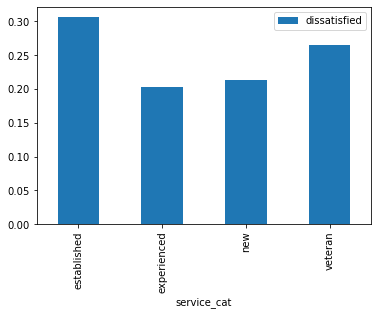

In [35]:
pivot = combined.pivot_table(values = 'dissatisfied', index = 'service_cat')
%matplotlib inline
pivot.plot(kind = 'bar')

So now we can see that between the two agencies, people who have been at the agency 7-10 years are the most likely to resign due to unhappiness. 